This notebook uses the datasets produced by sentiment analysis&emotion plot.ipynb:       
df_cate_days_narrow_2012 and df_cate_days_narrow_2013.


In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import scipy.stats as stats
pd.set_option('display.width',200)
pd.set_option('display.max_colwidth',100)

# Posemo&Negemo Correlation Analysis

In [69]:
df_pos_neg_days_2012 = df_cate_days_narrow_2012[['Posemo','Negemo']]
df_pos_neg_days_2013 = df_cate_days_narrow_2013[['Posemo','Negemo']]

## Correlation Analysis

### Normalized Cross Correlation

In [327]:
df_pos_days_2012 = df_pos_neg_days_2012['Posemo']
df_neg_days_2012 = df_pos_neg_days_2012['Negemo']

In [328]:
df_pos_days_2012_normalized = (df_pos_days_2012 - np.mean(df_pos_days_2012)) / (np.std(df_pos_days_2012) * len(df_pos_days_2012))
df_neg_days_2012_normalized  = (df_neg_days_2012 - np.mean(df_neg_days_2012)) / (np.std(df_neg_days_2012))
df_pos_neg_corr_2012 = np.correlate(df_pos_days_2012_normalized, df_neg_days_2012_normalized, 'same')

In [345]:
df_pos_days_2013 = df_pos_neg_days_2013['Posemo']
df_neg_days_2013 = df_pos_neg_days_2013['Negemo']

In [346]:
df_pos_days_2013_normalized = (df_pos_days_2013 - np.mean(df_pos_days_2013)) / (np.std(df_pos_days_2013) * len(df_pos_days_2013))
df_neg_days_2013_normalized  = (df_neg_days_2013 - np.mean(df_neg_days_2013)) / (np.std(df_neg_days_2013))
df_pos_neg_corr_2013 = np.correlate(df_pos_days_2013_normalized, df_neg_days_2013_normalized, 'same')

Text(0.5, 1.0, 'Cross-correlation')

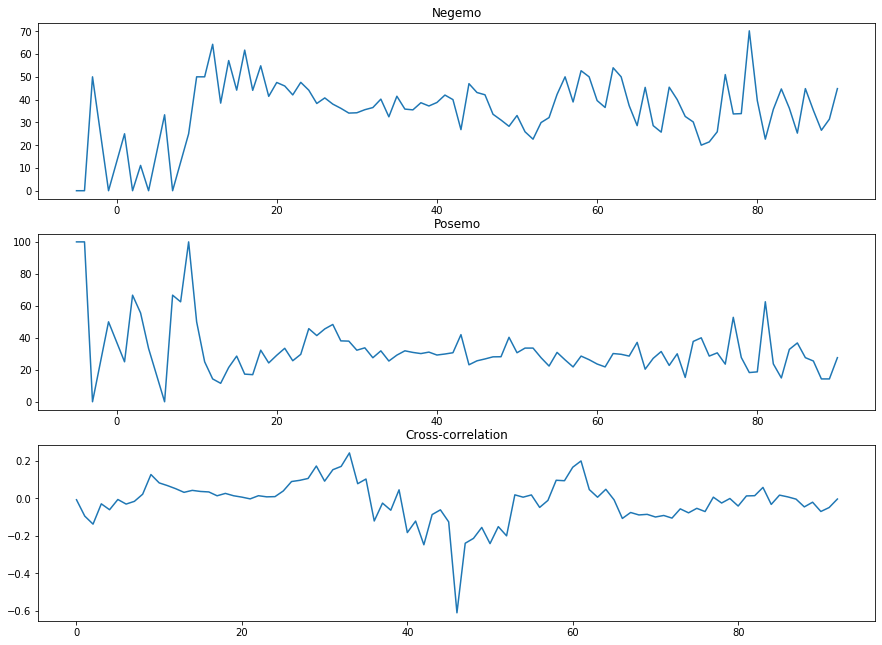

In [348]:
fig, ax = plt.subplots(3, 1,figsize = (15,11))
ax[0].plot(df_pos_neg_days_2012['Negemo'])
ax[0].set_title('Negemo')
ax[1].plot(df_pos_neg_days_2012['Posemo'])
ax[1].set_title('Posemo')
ax[2].plot(df_pos_neg_corr_2012)
ax[2].set_title('Cross-correlation')

Text(0.5, 1.0, 'Cross-correlation')

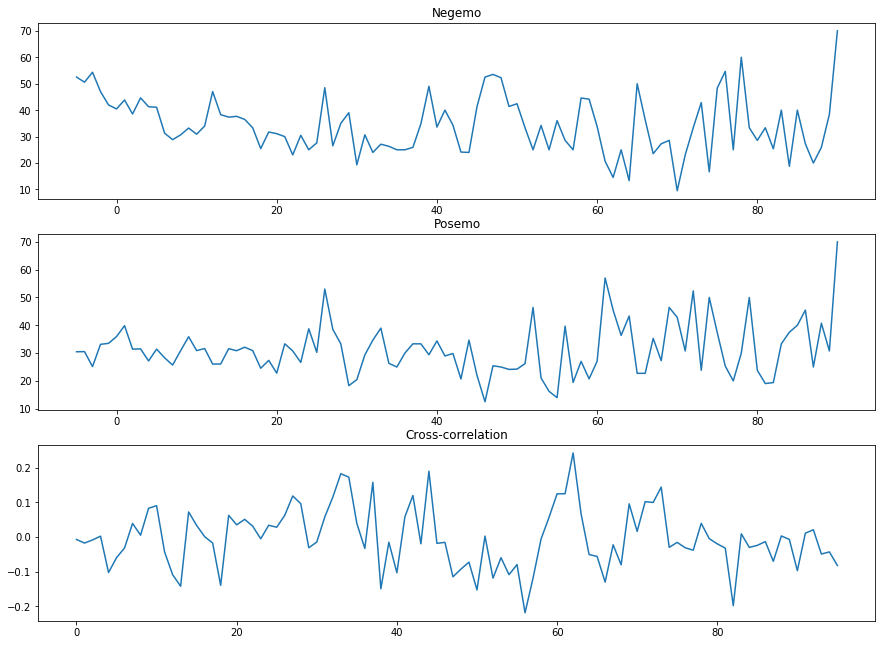

In [349]:
fig, ax = plt.subplots(3, 1,figsize = (15,11))
ax[0].plot(df_pos_neg_days_2013['Negemo'])
ax[0].set_title('Negemo')
ax[1].plot(df_pos_neg_days_2013['Posemo'])
ax[1].set_title('Posemo')
ax[2].plot(df_pos_neg_corr_2013)
ax[2].set_title('Cross-correlation')

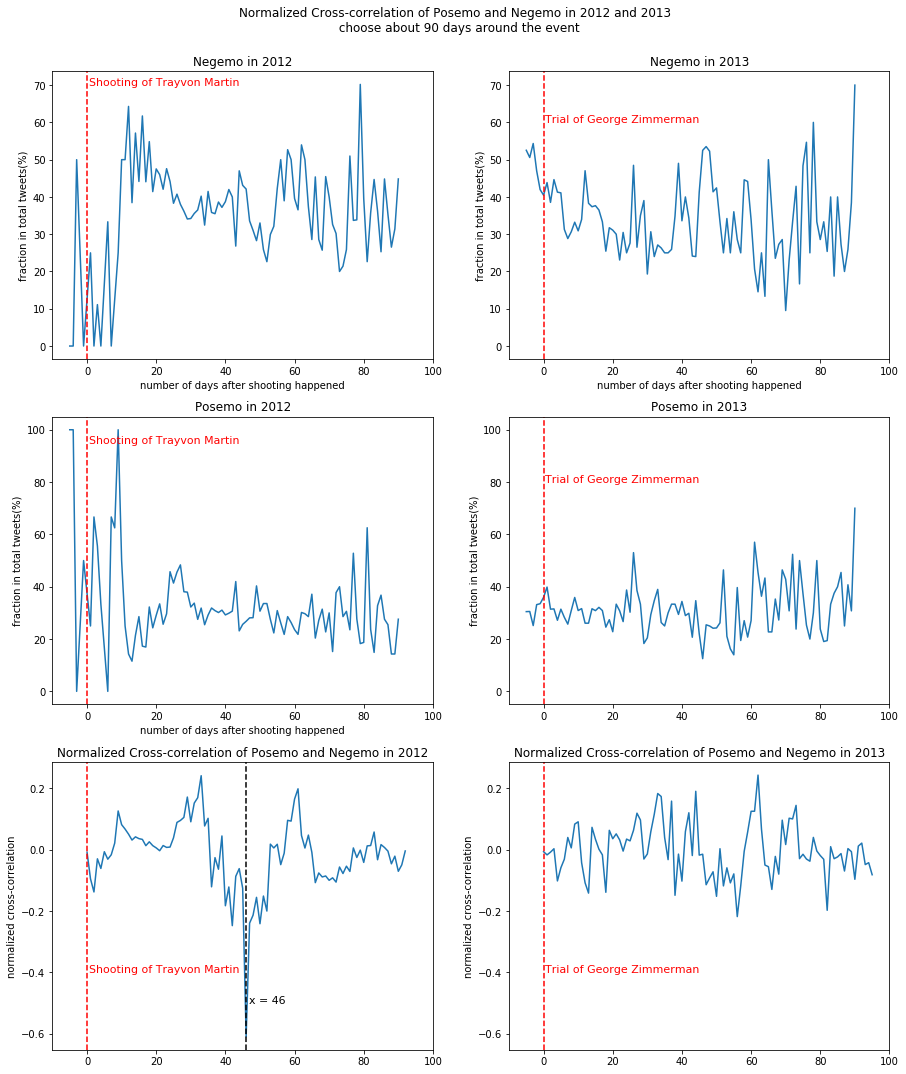

In [416]:
fig, ax = plt.subplots(3, 2,figsize = (15,18),sharex=True,sharey='row')
ax[0,0].plot(df_pos_neg_days_2012['Negemo'])
ax[0,0].set_title('Negemo in 2012')
ax[0,0].set_xlabel('number of days after shooting happened')
ax[0,0].set_ylabel('fraction in total tweets(%)')
ax[0,0].xaxis.set_tick_params(labelbottom=True)
ax[0,0].axvline(x=0,color = 'r',linestyle = '--')
ax[0,0].text(x =0.5,y = 70, s = "Shooting of Trayvon Martin",color = "r",fontsize = 11)

ax[1,0].plot(df_pos_neg_days_2012['Posemo'])
ax[1,0].set_title('Posemo in 2012')
ax[1,0].set_xlabel('number of days after shooting happened')
ax[1,0].set_ylabel('fraction in total tweets(%)')
ax[1,0].xaxis.set_tick_params(labelbottom=True)
ax[1,0].axvline(x=0,color = 'r',linestyle = '--')
ax[1,0].text(x =0.5,y = 95, s = "Shooting of Trayvon Martin",color = "r",fontsize = 11)

ax[2,0].plot(df_pos_neg_corr_2012)
ax[2,0].set_title('Normalized Cross-correlation of Posemo and Negemo in 2012')
ax[2,0].set_ylabel('normalized cross-correlation')
ax[2,0].axvline(x=0,color = 'r',linestyle = '--')
ax[2,0].text(x =0.5,y = -0.4, s = "Shooting of Trayvon Martin",color = "r",fontsize = 11)
ax[2,0].axvline(x=np.argmin(df_pos_neg_corr_2012),color = 'k',linestyle = '--')
ax[2,0].text(x = np.argmin(df_pos_neg_corr_2012)+0.7,y = -0.5, s = "x = "+str(np.argmin(df_pos_neg_corr_2012)),color = "k",fontsize = 11)

ax[0,1].plot(df_pos_neg_days_2013['Negemo'])
ax[0,1].set_title('Negemo in 2013')
ax[0,1].set_ylabel('fraction in total tweets(%)')
ax[0,1].set_xlabel('number of days after shooting happened')
ax[0,1].yaxis.set_tick_params(labelleft=True)
ax[0,1].xaxis.set_tick_params(labelbottom=True)
ax[0,1].axvline(x=0,color = 'r',linestyle = '--')
ax[0,1].text(x =0.5,y = 60, s = "Trial of George Zimmerman",color = "r",fontsize = 11)

ax[1,1].plot(df_pos_neg_days_2013['Posemo'])
ax[1,1].set_title('Posemo in 2013')
ax[1,1].set_ylabel('fraction in total tweets(%)')
ax[1,1].xaxis.set_tick_params(labelbottom=True)
ax[1,1].yaxis.set_tick_params(labelleft=True)
ax[1,1].axvline(x=0,color = 'r',linestyle = '--')
ax[1,1].text(x =0.5,y = 80, s = "Trial of George Zimmerman",color = "r",fontsize = 11)

ax[2,1].plot(df_pos_neg_corr_2013)
ax[2,1].set_title('Normalized Cross-correlation of Posemo and Negemo in 2013')
ax[2,1].set_ylabel('normalized cross-correlation')
ax[2,1].yaxis.set_tick_params(labelleft=True)
ax[2,1].axvline(x=0,color = 'r',linestyle = '--')
ax[2,1].text(x =0.5,y = -0.4, s = "Trial of George Zimmerman",color = "r",fontsize = 11)

plt.suptitle(y =0.93,t = "Normalized Cross-correlation of Posemo and Negemo in 2012 and 2013 \n choose about 90 days around the event")
plt.savefig("NCC of posemo and negemo")